In [2]:
import xarray as xr

In [8]:
import pandas as pd

In [51]:
import geopandas as gpd

In [85]:
import matplotlib.pyplot as plt

In [77]:
ctrl_point_grid = gpd.read_file("../data/reference/ARIS/small_grid_ids_500m")
ctrl_point_grid.index = pd.MultiIndex.from_frame(ctrl_point_grid[["LON_ID", "LAT_ID"]], names=["LON_Index", "LAT_Index"])
# ctrl_point_grid

In [78]:
def read_x_y_from_ctrl_grid(xix, yix):
    return ctrl_point_grid.loc[(xix, yix), ["x", "y"]].values

In [79]:
locations = pd.read_csv("../data/reference/ARIS/lonlat_inca_cropshift.csv", sep=";", header=0, index_col="ID")
locations = locations.transform(lambda row: read_x_y_from_ctrl_grid(row.LON_Index, row.LAT_Index), axis=1).rename(columns={"LON_Index": "x", "LAT_Index": "y"})
locations

,x,y
ID,,
Zwerndorf,659750,499250
Mistelbach,637250,529250
Andau,677750,437750
Litschach,526250,562250
Kremsmünster,459250,462750
Radsberg,483250,298750
Rum,257750,377750
Bregenz,127750,406750


In [110]:
pd.to_datetime(eta[["Year", "Month", "Day"]])

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
29203   2029-12-29
29204   2029-12-29
29205   2029-12-29
29206   2029-12-29
29207   2029-12-29
Length: 29208, dtype: datetime64[ns]

In [109]:
eta[["Year", "Month", "Day"]]

,Year,Month,Day
0,2020,1,1
1,2020,1,1
2,2020,1,1
3,2020,1,1
4,2020,1,1
...,...,...,...
29203,2029,12,29
29204,2029,12,29
29205,2029,12,29
29206,2029,12,29


In [116]:
eta = pd.read_csv("../data/reference/ARIS/INCA_ETA_2020.csv", sep=";", header=0, decimal=",")
eta.index = pd.MultiIndex.from_arrays([eta["ID"], pd.to_datetime(eta[["Year", "Month", "Day"]])], names=["ID", "date"])
eta = eta.iloc(1)[-1]
eta

ID            date      
Radsberg      2020-01-01    0.12
Rum           2020-01-01    0.12
Bregenz       2020-01-01    0.12
Andau         2020-01-01    0.12
Kremsmünster  2020-01-01    0.12
                            ... 
Andau         2029-12-29    0.12
Kremsmünster  2029-12-29    0.12
Zwerndorf     2029-12-29    0.12
Mistelbach    2029-12-29    0.12
Litschach     2029-12-29    0.12
Name: eta, Length: 29208, dtype: float64

In [ ]:
eta = pd.read_csv("../data/reference/ARIS/INCA_ETA_2020.csv", sep=";", header=0, parse_dates=[["Year", "Month", "Day"]], index_col=["ID", "Year_Month_Day"], decimal=",").loc(0)[:, "2020"].sort_index()
eta

/tmp/ipykernel_1265807/899186601.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  eta = pd.read_csv("../data/reference/ARIS/INCA_ETA_2020.csv", sep=";", header=0, parse_dates=[["Year", "Month", "Day"]], index_col=["ID", "Year_Month_Day"], decimal=",").loc(0)[:, "2020"].sort_index()


LON_Index  LAT_Index   eta
ID        Year_Month_Day                            
Andau     2020-01-01           1135        335  0.12
          2020-01-02           1135        335  0.12
          2020-01-03           1135        335  0.12
          2020-01-04           1135        335  0.12
          2020-01-05           1135        335  0.12
...                             ...        ...   ...
Zwerndorf 2020-12-27           1099        458  0.12
          2020-12-28           1099        458  0.12
          2020-12-29           1099        458  0.12
          2020-12-30           1099        458  0.12
          2020-12-31           1099        458  0.12

[2928 rows x 3 columns]

In [100]:
ds = xr.open_zarr("../data/intermediate/2020.zarr", decode_coords="all").sel(crop="winter wheat")

In [117]:
ctrl_dict = dict(
    evapotranspiration = "ETA",
    Kc_factor = "kc",
)

In [122]:
def read_ctrl_data(variable):
    df = pd.read_csv(f"../data/reference/ARIS/INCA_{ctrl_dict[variable]}_2020.csv", sep=";", header=0, decimal=",")
    df.index = pd.MultiIndex.from_arrays([df["ID"], pd.to_datetime(df[["Year", "Month", "Day"]])], names=["ID", "date"])
    return df.loc(0)[:, "2020"].iloc(1)[-1]

In [125]:
def postprocess(da):
    if da.name in ["evapotranspiration"]:
        return da.sum("layer")
    return da

In [126]:
def compare_ctrl(variable):
    ctrl_series = read_ctrl_data(variable)
    for ID in locations.index:
        ds.sel(**locations.loc[ID], method="nearest")[variable].pipe(postprocess).plot()
        ctrl_series.loc[ID].plot(ax=plt.gca())
        plt.show()

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


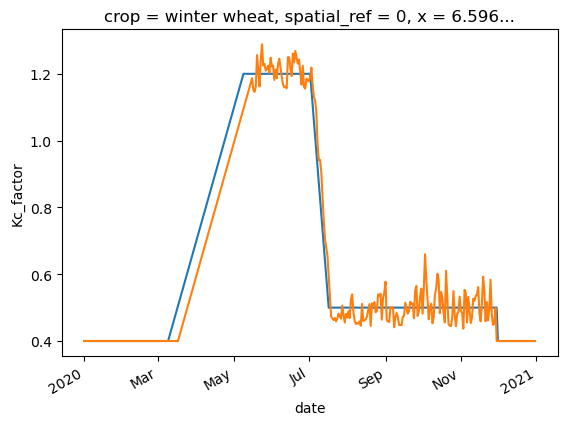

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


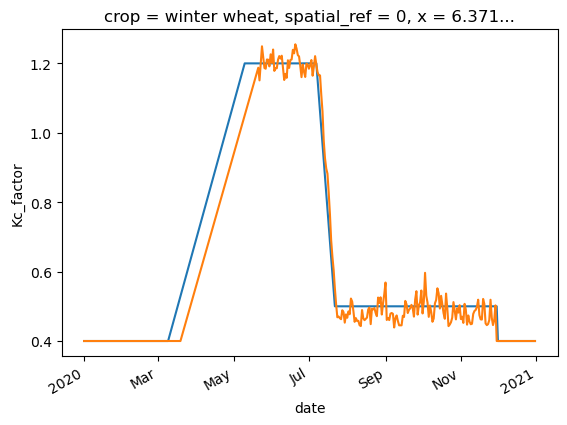

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


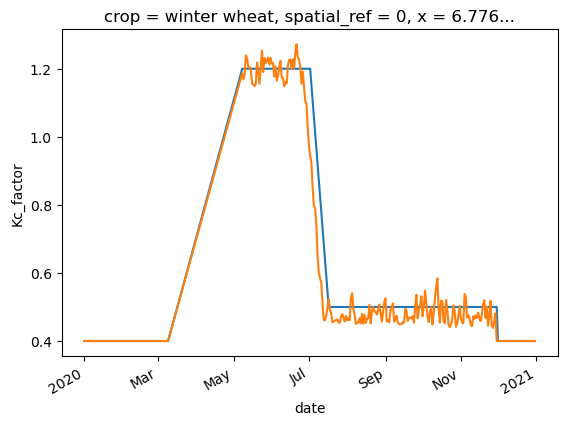

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


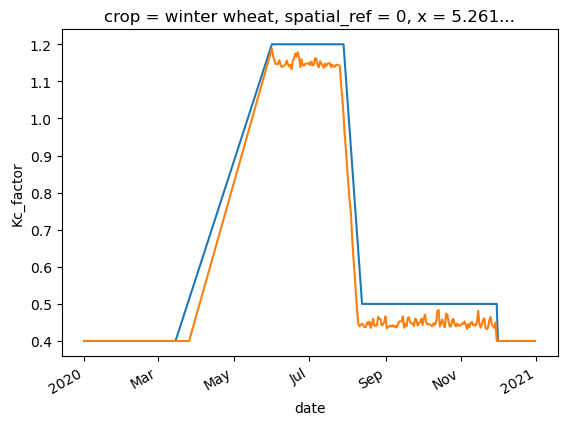

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


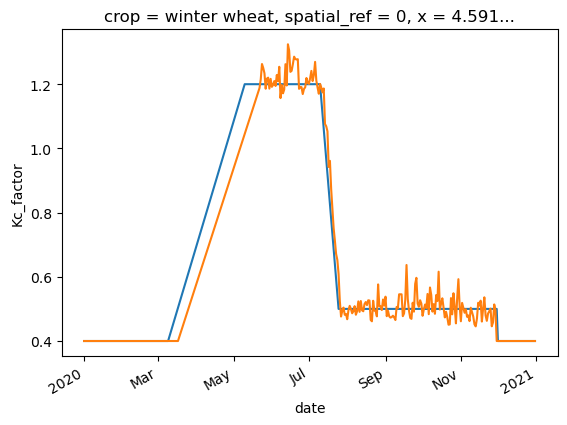

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


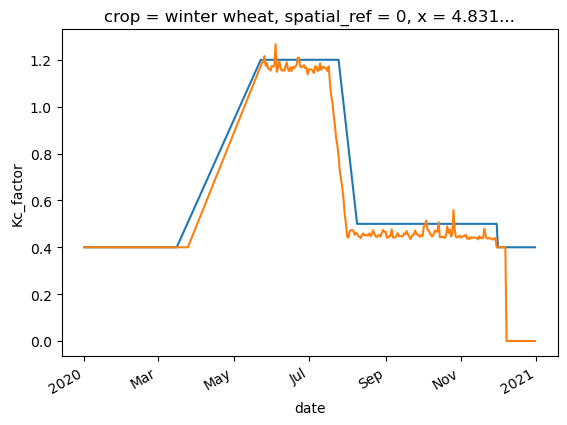

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


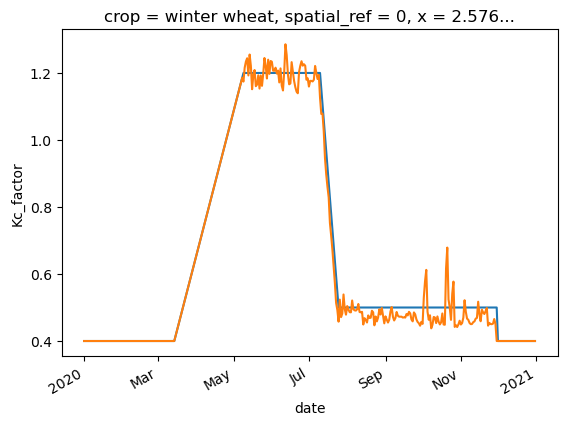

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


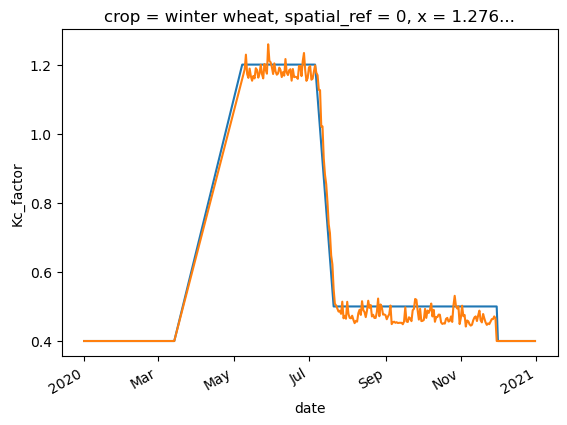

In [128]:
compare_ctrl("Kc_factor")

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


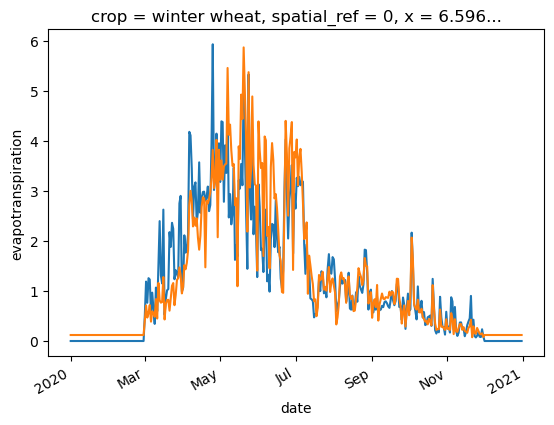

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


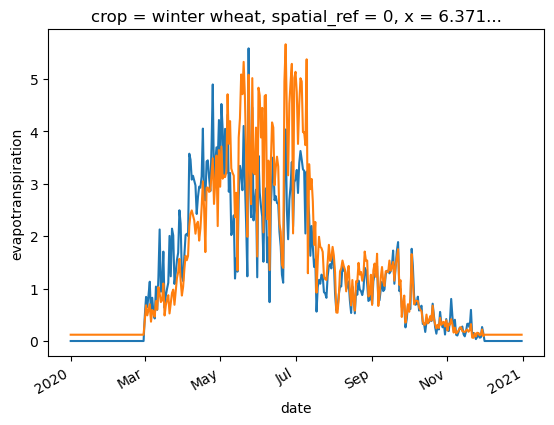

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


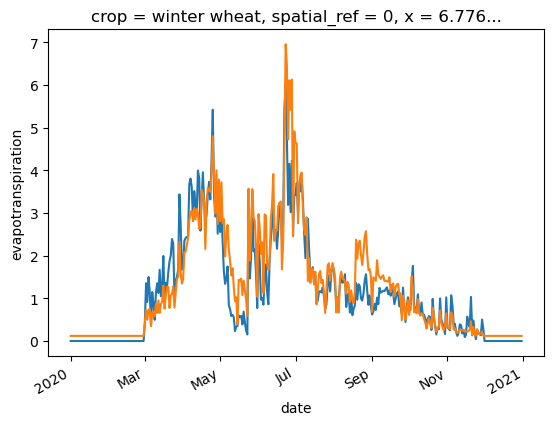

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


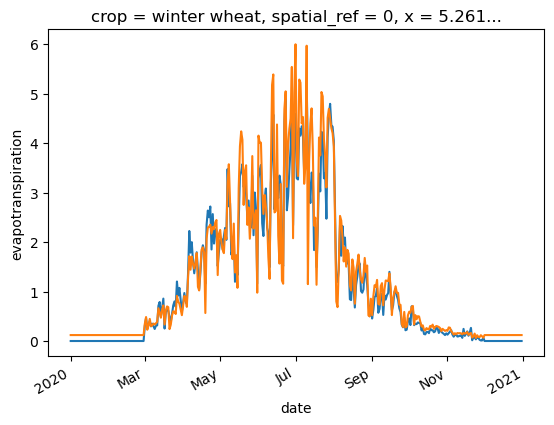

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


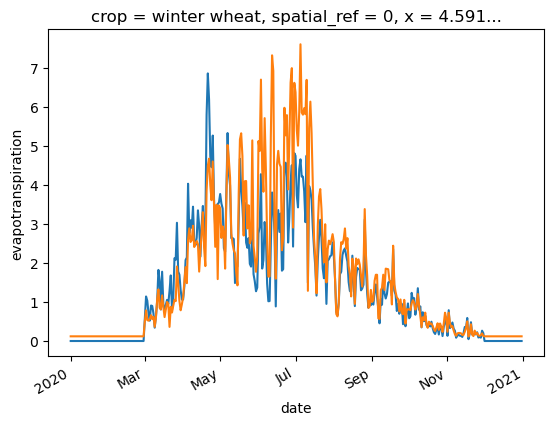

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


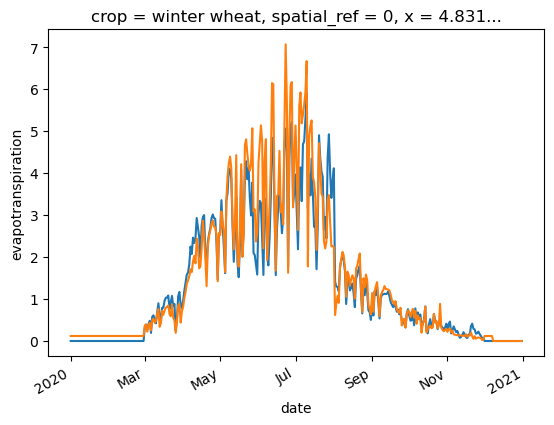

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


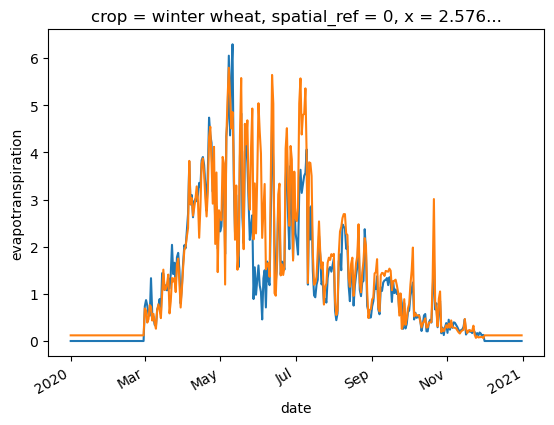

/home/haacker/miniforge3/envs/devel/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


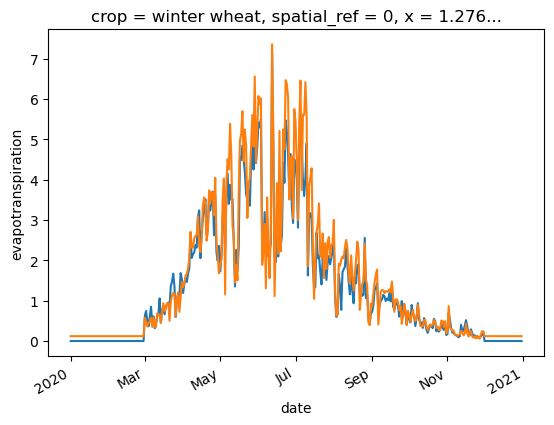

In [ ]:
compare_ctrl("evapotranspiration")